In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [9]:
!pip install matplotlib

  Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl.metadata (11 kB)
  Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.55.3-cp313-cp313-win_amd64.whl.metadata (168 kB)
  Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl.metadata (6.3 kB)
  Using cached pillow-11.0.0-cp313-cp313-win_amd64.whl.metadata (9.3 kB)
  Using cached pyparsing-3.2.0-py3-none-any.whl.metadata (5.0 kB)
Using cached matplotlib-3.10.0-cp313-cp313-win_amd64.whl (8.0 MB)
Using cached contourpy-1.3.1-cp313-cp313-win_amd64.whl (220 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.55.3-cp313-cp313-win_amd64.whl (2.2 MB)
Using cached kiwisolver-1.4.8-cp313-cp313-win_amd64.whl (71 kB)
Using cached pillow-11.0.0-cp313-cp313-win_amd64.whl (2.6 MB)
Using cached pyparsing-3.2.0-py3-none-any.whl (106 kB)


In [16]:
import matplotlib.pyplot as plt

# Step 1: Load dataset
data = pd.read_csv("Mall_Customers.csv")

# Step 2: Data Preprocessing
# Remove outliers using the IQR method for "Annual Income (k$)"
Q1 = data["Annual Income (k$)"].quantile(0.25)
Q3 = data["Annual Income (k$)"].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
data_filtered = data[(data["Annual Income (k$)"] >= lower_bound) & (data["Annual Income (k$)"] <= upper_bound)]

Model Performance Comparison:
                            MAE           MSE        R2
Linear Regression  4.668488e-15  4.680534e-29  1.000000
Decision Tree      5.500000e-01  9.000000e-01  0.998691
Random Forest      5.730000e-01  9.394650e-01  0.998634


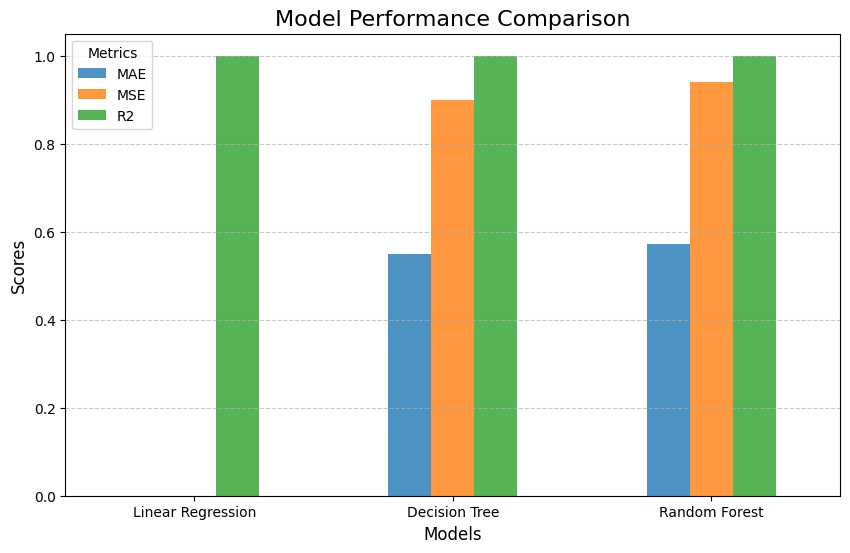

In [14]:


# Convert "Gender" to numeric using One-Hot Encoding
data_prepared = pd.get_dummies(data_filtered, columns=["Gender"], drop_first=True)

# Select relevant features and target
features = ["Age", "Annual Income (k$)", "Spending Score (1-100)", "Gender_Male"]
target = "Spending Score (1-100)"
X = data_prepared[features]
y = data_prepared[target]

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 4: Initialize models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
}

# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    predictions = model.predict(X_test)  # Make predictions
    results[name] = {
        "MAE": mean_absolute_error(y_test, predictions),
        "MSE": mean_squared_error(y_test, predictions),
        "R2": r2_score(y_test, predictions),
    }

# Step 5: Display results as a DataFrame
results_df = pd.DataFrame(results).T
print("Model Performance Comparison:")
print(results_df)

# Step 6: Visualize results
results_df[["MAE", "MSE", "R2"]].plot(kind="bar", figsize=(10, 6), alpha=0.8)
plt.title("Model Performance Comparison", fontsize=16)
plt.ylabel("Scores", fontsize=12)
plt.xlabel("Models", fontsize=12)
plt.xticks(rotation=0)
plt.legend(title="Metrics", fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()